In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
prng = np.random.RandomState(10)

#### No categoricals

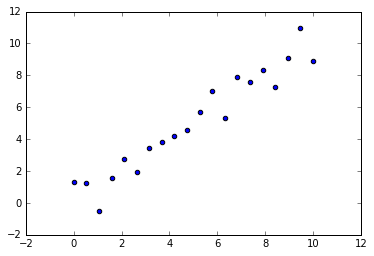

In [3]:
xs = np.linspace(0, 10, 20)
ys = xs + prng.normal(0, scale=1, size=len(xs))
plt.scatter(xs, ys);

In [4]:
from cgpm2.linreg import LinearRegression
from cgpm2.transition_hypers import transtion_hyper_grids
from cgpm2.transition_hypers import transition_hypers

In [5]:
linreg = LinearRegression([0], [1], distargs={'levels': [0]}, rng=prng)

In [6]:
for (rowid, (x, y)) in enumerate(zip(xs,ys)):
    linreg.incorporate(rowid, {0: x}, {1:y})    

In [7]:
grids = transtion_hyper_grids([linreg],)
for _i in xrange(10):
    transition_hypers([linreg], grids, prng)

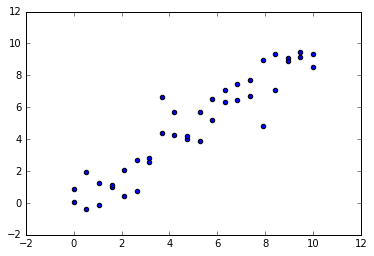

In [8]:
fig, ax = plt.subplots()
for x in xs:
    preds = [sample[0] for sample in linreg.simulate(None, [0], None, {1:x}, N=2)]
    ax.scatter([x]*len(preds), preds)

#### Now add a categorical variable.

In [9]:
num_xs = 20

xs0 = np.linspace(0, 10, num_xs)
ys0 = xs0 + prng.normal(0, scale=1, size=len(xs0))
zs0 = [0]*len(xs0)

xs1 = np.linspace(0, 10, num_xs)
ys1 = xs1 + prng.normal(0, scale=1, size=len(xs1)) + 500
zs1 = [1]*len(xs1)

xs2 = np.linspace(0, 10, num_xs)
ys2 = xs2 + prng.normal(0, scale=1, size=len(xs2)) + 1000
zs2 = [2]*len(xs2)

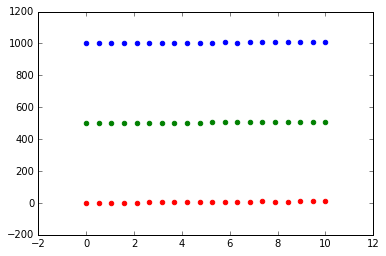

In [10]:
fig, ax = plt.subplots()
ax.scatter(xs0,ys0,color='r')
ax.scatter(xs1,ys1,color='g')
ax.scatter(xs2,ys2,color='b')

In [11]:
linreg = LinearRegression([0], [1,2], distargs={'levels': [0, 3]}, rng=prng)

In [12]:
for rowid, (x,y,z) in enumerate(zip(xs0, ys0, zs0)):
    linreg.incorporate(rowid, {0:y}, {1:x, 2:z})
for rowid, (x,y,z) in enumerate(zip(xs1, ys1, zs1)):
    linreg.incorporate(rowid+len(xs0), {0:y}, {1:x, 2:z})
for rowid, (x,y,z) in enumerate(zip(xs2, ys2, zs2)):
    linreg.incorporate(rowid+len(xs0)+len(xs1), {0:y}, {1:x, 2:z})

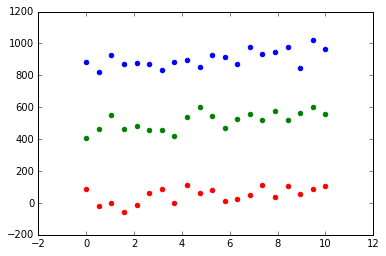

In [13]:
fig, ax = plt.subplots()
for x in xs0:
    preds = [sample[0] for sample in linreg.simulate(None, [0], None, {1:x, 2:0}, N=20)]
    ax.scatter(x, np.mean(preds), color='r')
for x in xs1:
    preds = [sample[0] for sample in linreg.simulate(None, [0], None, {1:x, 2:1}, N=20)]
    ax.scatter(x, np.mean(preds), color='g')
for x in xs1:
    preds = [sample[0] for sample in linreg.simulate(None, [0], None, {1:x, 2:2}, N=20)]
    ax.scatter(x, np.mean(preds), color='b')

In [14]:
grids = transtion_hyper_grids([linreg],)
for _i in xrange(100):
    transition_hypers([linreg], grids, prng)

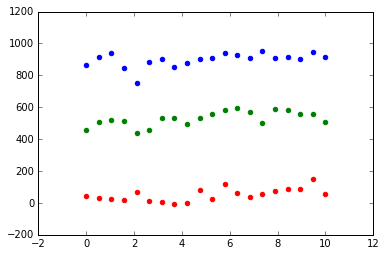

In [15]:
fig, ax = plt.subplots()
for x in xs:
    preds = [sample[0] for sample in linreg.simulate(None, [0], None, {1:x, 2:0}, N=20)]
    ax.scatter(x, np.mean(preds), color='r')
for x in xs:
    preds = [sample[0] for sample in linreg.simulate(None, [0], None, {1:x, 2:1}, N=20)]
    ax.scatter(x, np.mean(preds), color='g')
for x in xs:
    preds = [sample[0] for sample in linreg.simulate(None, [0], None, {1:x, 2:2}, N=20)]
    ax.scatter(x, np.mean(preds), color='b')

In [16]:
for x,y,z in zip(xs0,ys0,zs0):
    lp1 = linreg.logpdf(None, {0:y}, None, {1:x, 2:0})
    lp2 = linreg.logpdf(None, {0:y}, None, {1:x, 2:1})
    lp3 = linreg.logpdf(None, {0:y}, None, {1:x, 2:2})
    print (lp1, lp2, lp3)

(-6.0923193876187725, -9.785003557457458, -17.678528299896243)
(-6.088835114045196, -9.846622672021567, -17.823621035414362)
(-6.086551984777998, -9.933277185366933, -18.00701462901725)
(-6.085649993233346, -10.030485689473153, -18.203293446026237)
(-6.085428932132345, -10.113631199917108, -18.37030117771701)
(-6.085678346373243, -10.184160789533507, -18.510628440948494)
(-6.088774460573404, -10.287575408769044, -18.700895895377926)
(-6.09097967641037, -10.35407427191467, -18.823449977211112)
(-6.093758936726772, -10.41407906259974, -18.929650770708122)
(-6.101468201008629, -10.522712045260505, -19.111101262909415)
(-6.105012385331975, -10.564109847294276, -19.175177657393306)
(-6.113542218125076, -10.648343483911049, -19.304478851222484)
(-6.117613302087648, -10.673720545322794, -19.331258560292554)
(-6.129021444300179, -10.759390043369422, -19.451579695191867)
(-6.1332955860343645, -10.768193009987044, -19.440706002612387)
(-6.1531518026085905, -10.898869396418377, -19.6230884556785)

In [17]:
for x,y,z in zip(xs1, ys1, zs1):
    lp1 = linreg.logpdf(None, {0:y}, None, {1:x, 2:0})
    lp2 = linreg.logpdf(None, {0:y}, None, {1:x, 2:1})
    lp3 = linreg.logpdf(None, {0:y}, None, {1:x, 2:2})
    print (lp1, lp2, lp3)

(-10.014288606910668, -6.098267925974142, -8.14708116505335)
(-9.983137384146175, -6.092193520967157, -8.201850168637066)
(-9.933543089055547, -6.086558366798272, -8.268147260482692)
(-9.885200405369233, -6.08209956516157, -8.33124848540001)
(-9.840709951189638, -6.078742188807155, -8.388772251733826)
(-9.793203850460486, -6.076344260815404, -8.445837511485479)
(-9.742382519403236, -6.074927639893303, -8.502596506541067)
(-9.69527593635803, -6.074384040892255, -8.553126712658468)
(-9.637451295028768, -6.074954892847018, -8.609335313634347)
(-9.551634651309996, -6.0775645073990745, -8.686590417842126)
(-9.548667532727904, -6.077694203160263, -8.688331094419937)
(-9.436293129111618, -6.083661238478271, -8.782810213274843)
(-9.382849762411297, -6.0875926593348595, -8.821746646771317)
(-9.312065530537438, -6.093478258356754, -8.873110740441007)
(-9.257134444868825, -6.098894981066223, -8.906270069169295)
(-9.206116706925968, -6.104516818356387, -8.932049479553825)
(-9.114397437276693, -6.1

In [18]:
for x,y,z in zip(xs2, ys2, zs2):
    lp1 = linreg.logpdf(None, {0:y}, None, {1:x, 2:0})
    lp2 = linreg.logpdf(None, {0:y}, None, {1:x, 2:1})
    lp3 = linreg.logpdf(None, {0:y}, None, {1:x, 2:2})
    print (lp1, lp2, lp3)

(-21.449125571135482, -10.400643096491876, -6.420033022102416)
(-21.470061025575887, -10.37947111198082, -6.404418994939078)
(-21.42266259183998, -10.324081919935907, -6.380676273449353)
(-21.457389338222583, -10.317311423635147, -6.371427348386987)
(-21.33656201463691, -10.229089148369894, -6.341947371592596)
(-21.308315600550486, -10.195212797470504, -6.32815757523349)
(-21.15042838106774, -10.095004571448953, -6.2993459015574444)
(-21.142767997069768, -10.079823024500001, -6.292768640626036)
(-21.043311739234014, -10.019062491808654, -6.276544816906608)
(-20.898115635021895, -9.93785533946857, -6.257161961789734)
(-20.806729548592557, -9.889312254295874, -6.246561236793241)
(-20.687205649561292, -9.829672358616335, -6.234795199524342)
(-20.51086417122542, -9.743942294470344, -6.218959514344533)
(-20.38329788796409, -9.687724624827752, -6.210518083498755)
(-20.187402945536633, -9.599506098304118, -6.197106202263058)
(-20.01413811013208, -9.526822553876627, -6.188030406332473)
(-19.81

#### Test chain.

In [19]:
from cgpm2.flexible_rowmix import FlexibleRowMixture
from cgpm2.crp import CRP
from cgpm2.normal import Normal
from cgpm2.categorical import Categorical
from cgpm2.product import Product
mixture = FlexibleRowMixture(
    cgpm_row_divide=CRP([-1],[],rng=prng),
    cgpm_components_base=Product([
        Normal([1],[],rng=prng),
        Categorical([2],[],distargs={'k':3}, rng=prng),
    ])
)

In [20]:
for rowid, (x,z) in enumerate(zip(xs0,zs0)):
    mixture.incorporate(rowid, {1:x, 2:z})
for rowid, (x,z) in enumerate(zip(xs1,zs1)):
    mixture.incorporate(rowid + len(xs0), {1:x, 2:z})
for rowid, (x,z) in enumerate(zip(xs2,zs2)):
    mixture.incorporate(rowid + len(xs0) + len(xs1), {1:x, 2:z})

In [21]:
from cgpm2.chain import Chain

In [22]:
chain = Chain([linreg, mixture])

In [23]:
# Forward sample all.
chain.simulate(None, [0,1,2])

{0: 721.7604269110308, 1: 7.4797620973033645, 2: 1}

In [24]:
# Forward sample, but let 1 be implicit.
chain.simulate(None, [0,2])

{0: 609.3498285566478, 2: 2}

In [25]:
chain.accuracy = 100

(0, 3)

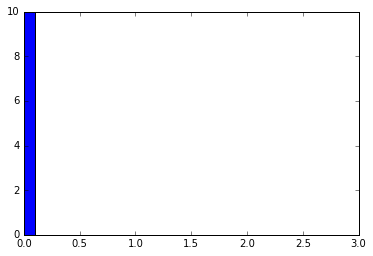

In [26]:
# Invert the sample, simulate x,z | y = 0
samples = chain.simulate(None, [1,2], {0:0}, N=10)
plt.hist([s[2] for s in samples])
plt.xlim([0,3])

(0, 3)

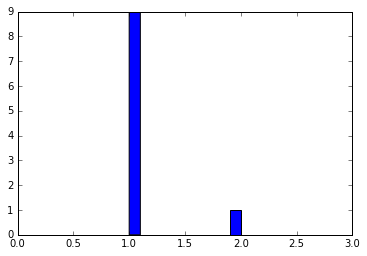

In [27]:
# Invert the sample, simulate x,z | y = 500
samples = chain.simulate(None, [1,2], {0:500}, N=10)
plt.hist([s[2] for s in samples])
plt.xlim([0,3])

(0, 3)

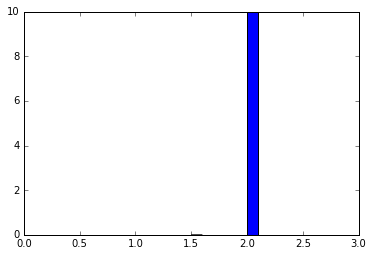

In [28]:
# Invert the sample, simulate x,z | y = 1000
samples = chain.simulate(None, [1,2], {0:1000}, N=10)
plt.hist([s[2] for s in samples])
plt.xlim([0,3])